## 1. Load the packages and dataframes

In [ ]:
import sys
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Add the project root to the system path
PROJECT_ROOT = Path.cwd().resolve().parent
print(f"Project root: {PROJECT_ROOT}")
sys.path.append(str(PROJECT_ROOT))




Project root: /Users/bharathbeeravelly/Desktop/mlops-loan-payback


In [7]:
NOTEBOOKS_DIR = PROJECT_ROOT / "notebooks"
DATA_DIR = PROJECT_ROOT / "data"
RAW_DATA_PATH = DATA_DIR / "raw"
PROCESSED_DATA_PATH = DATA_DIR / "processed"

In [9]:
# Load the dataframe
train_df = pd.read_csv(PROCESSED_DATA_PATH / "local_train.csv")


## 2. EDA


### 2.1 Missing Value Analysis

In [10]:
train_df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,92432.16,0.067,636,14369.05,13.78,Male,Married,Bachelor's,Employed,Debt consolidation,D1,1.0
1,28850.38,0.122,643,8471.26,14.40,Female,Married,High School,Employed,Debt consolidation,D5,1.0
2,39427.43,0.041,672,7647.50,11.99,Male,Married,High School,Employed,Debt consolidation,C3,1.0
3,71644.31,0.208,646,7125.57,12.19,Female,Single,High School,Unemployed,Car,D3,0.0
4,69010.47,0.186,708,10659.02,15.09,Male,Married,Bachelor's,Employed,Medical,C4,1.0


In [11]:
train_df.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,475195.000000,475195.000000,475195.000000,475195.000000,475195.000000,475195.000000
mean,48221.737087,0.120632,680.918497,15025.190161,12.357129,0.798819
std,26733.808141,0.068478,55.407560,6929.253596,2.007715,0.400883
min,6002.430000,0.011000,395.000000,500.370000,3.320000,0.000000
25%,27920.860000,0.072000,646.000000,10279.040000,10.990000,1.000000
50%,46621.540000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18870.480000,13.680000,1.000000
max,393381.740000,0.577000,849.000000,48959.950000,20.990000,1.000000


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475195 entries, 0 to 475194
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         475195 non-null  float64
 1   debt_to_income_ratio  475195 non-null  float64
 2   credit_score          475195 non-null  int64  
 3   loan_amount           475195 non-null  float64
 4   interest_rate         475195 non-null  float64
 5   gender                475195 non-null  object 
 6   marital_status        475195 non-null  object 
 7   education_level       475195 non-null  object 
 8   employment_status     475195 non-null  object 
 9   loan_purpose          475195 non-null  object 
 10  grade_subgrade        475195 non-null  object 
 11  loan_paid_back        475195 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 43.5+ MB


No missing values. 

### 2.2 Target Variable Analysis

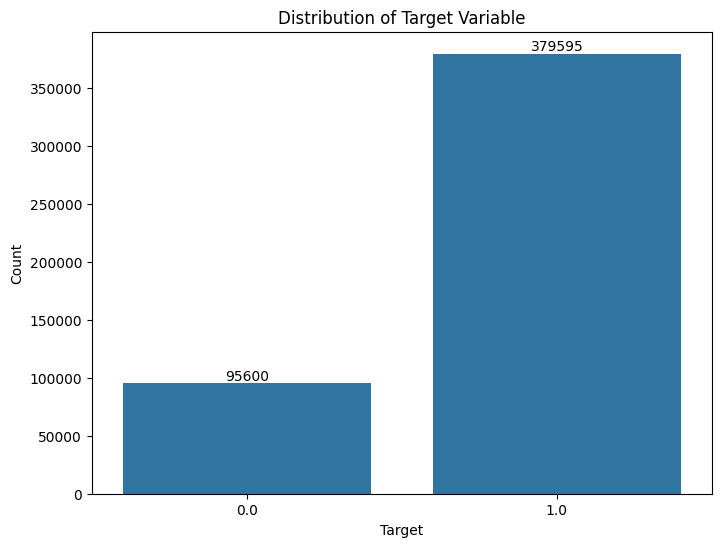

In [15]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='loan_paid_back', data=train_df)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [16]:
# Percentage of loans paid back vs not paid back
paid_back_counts = train_df['loan_paid_back'].value_counts(normalize=True) * 100
print(paid_back_counts)


loan_paid_back
1.0    79.881943
0.0    20.118057
Name: proportion, dtype: float64


### 2.3 Univariate Feature Analysis


#### 2.3.1 Numerical Features

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475195 entries, 0 to 475194
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         475195 non-null  float64
 1   debt_to_income_ratio  475195 non-null  float64
 2   credit_score          475195 non-null  int64  
 3   loan_amount           475195 non-null  float64
 4   interest_rate         475195 non-null  float64
 5   gender                475195 non-null  object 
 6   marital_status        475195 non-null  object 
 7   education_level       475195 non-null  object 
 8   employment_status     475195 non-null  object 
 9   loan_purpose          475195 non-null  object 
 10  grade_subgrade        475195 non-null  object 
 11  loan_paid_back        475195 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 43.5+ MB


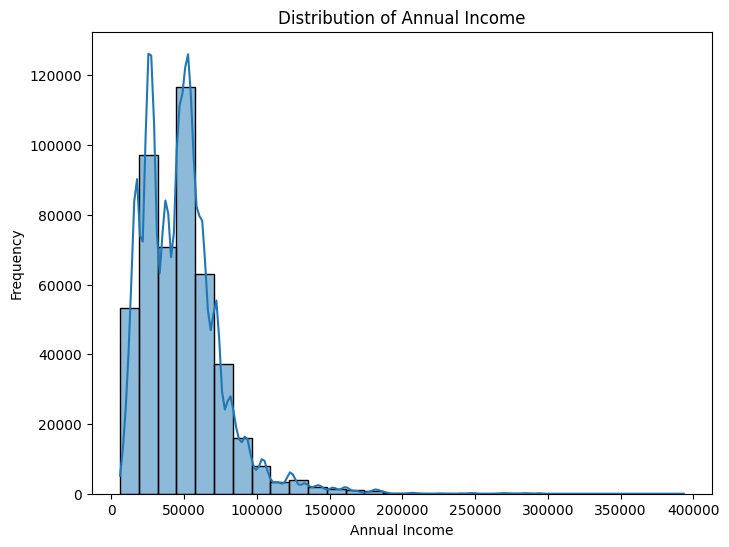

In [19]:
# Histogram of annual_income
plt.figure(figsize=(8, 6))
sns.histplot(train_df['annual_income'], bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

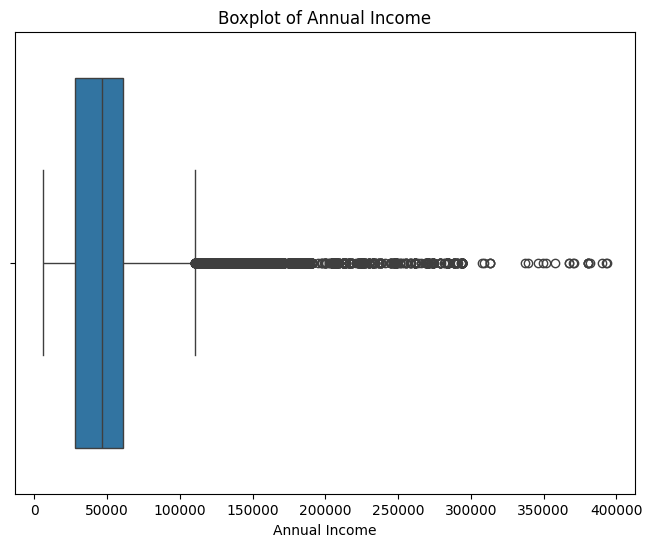

In [ ]:
# Box plot of annual_income
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['annual_income'])
plt.title('Boxplot of Annual Income')
plt.xlabel('Annual Income')
plt.show()



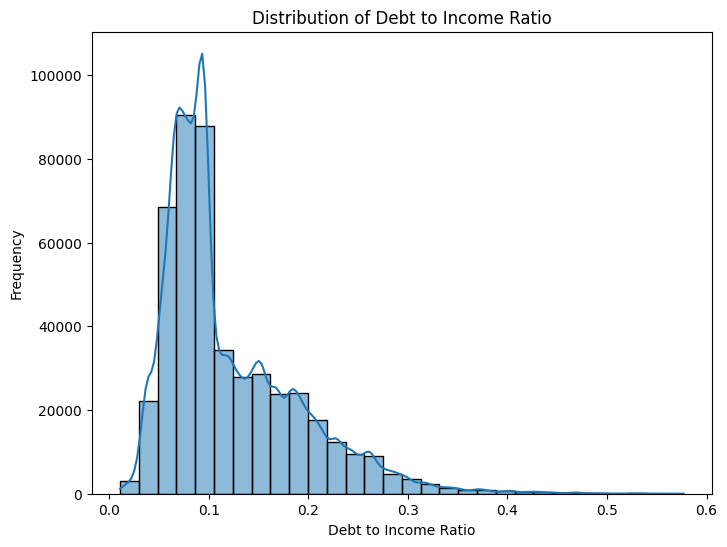

In [21]:
# Debt to income ratio
plt.figure(figsize=(8, 6))
sns.histplot(train_df['debt_to_income_ratio'], bins=30, kde=True)
plt.title('Distribution of Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Frequency')
plt.show()

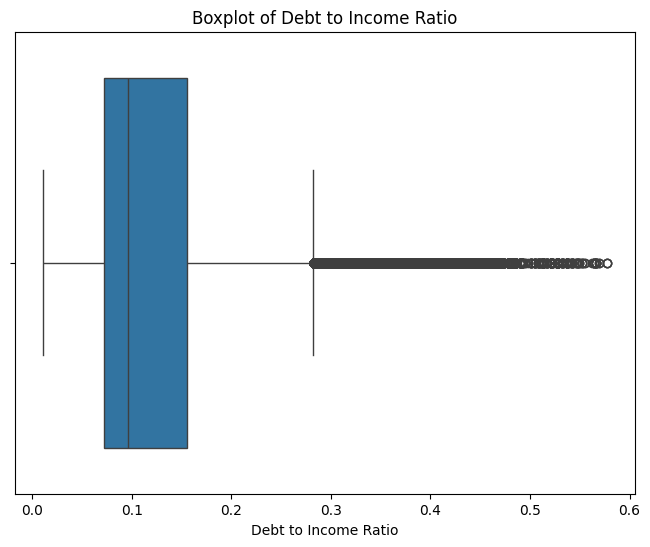

In [22]:
# Box plot of debt_to_income_ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['debt_to_income_ratio'])
plt.title('Boxplot of Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.show()

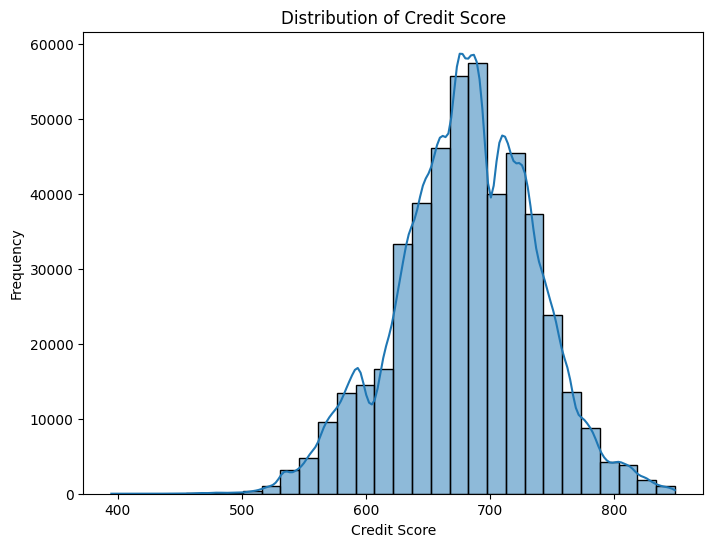

In [23]:
# Histogram of credit_score
plt.figure(figsize=(8, 6))
sns.histplot(train_df['credit_score'], bins=30, kde=True)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

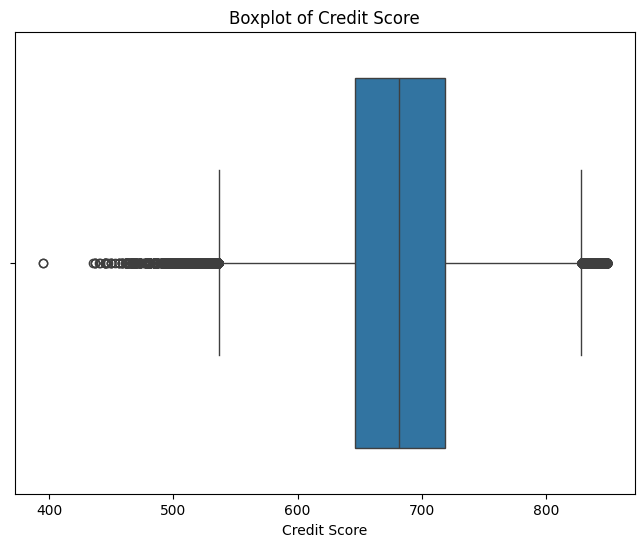

In [24]:
# Box plot of credit_score
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['credit_score'])
plt.title('Boxplot of Credit Score')
plt.xlabel('Credit Score')
plt.show()

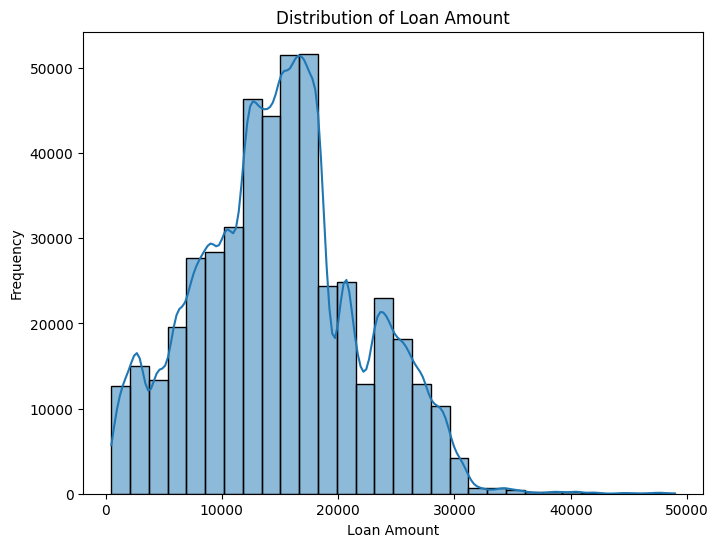

In [25]:
# Histogram of loan_amount
plt.figure(figsize=(8, 6))
sns.histplot(train_df['loan_amount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

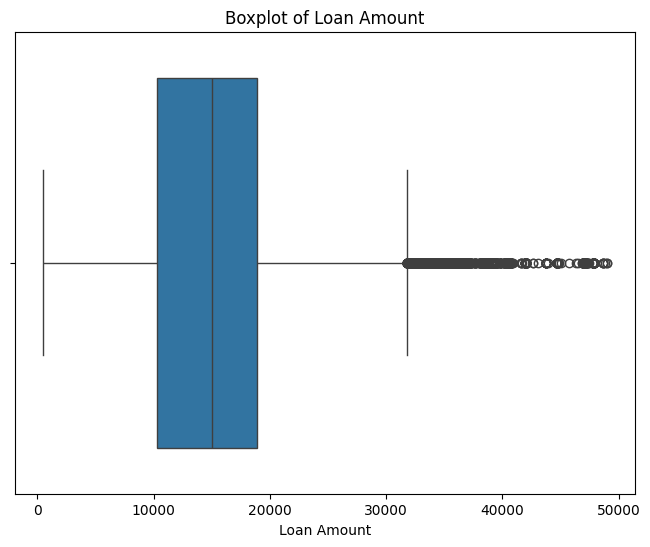

In [26]:
# Boxplot of credit_score
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['loan_amount'])
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

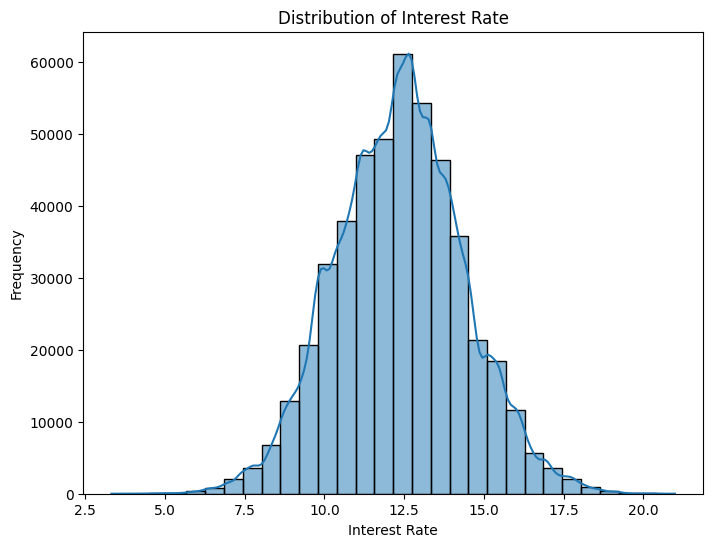

In [27]:
# Histogram of interest_rate
plt.figure(figsize=(8, 6))
sns.histplot(train_df['interest_rate'], bins=30, kde=True)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

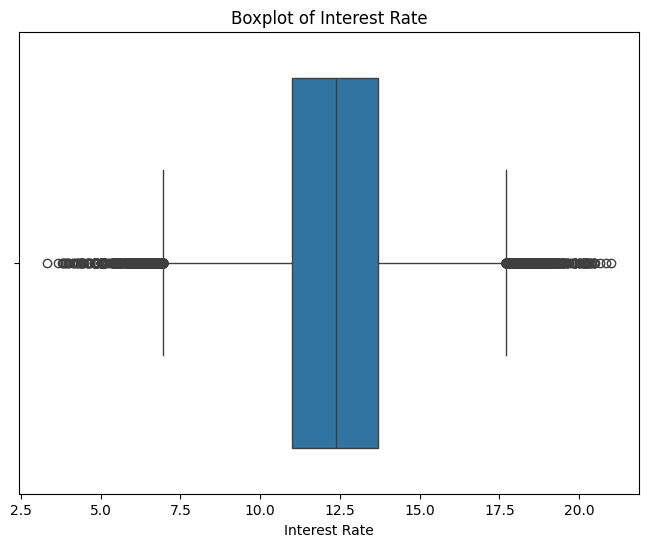

In [28]:
# Boxplot of interest_rate
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['interest_rate'])
plt.title('Boxplot of Interest Rate')
plt.xlabel('Interest Rate')
plt.show()

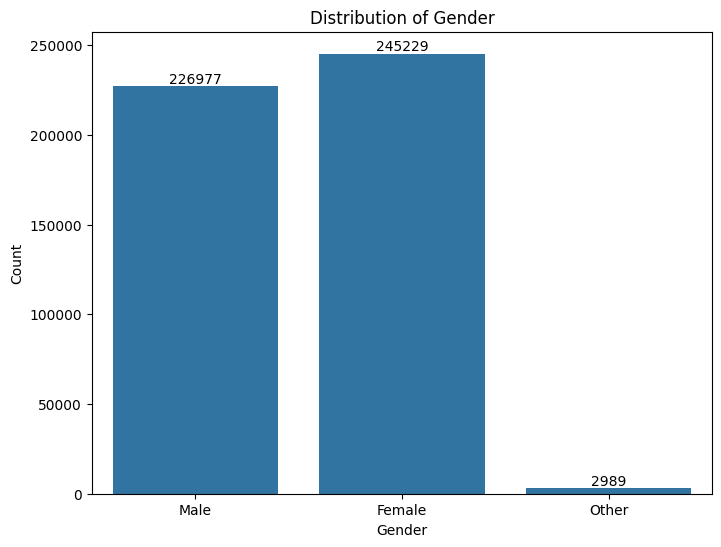

In [30]:
# Bar plot of gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', data=train_df)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

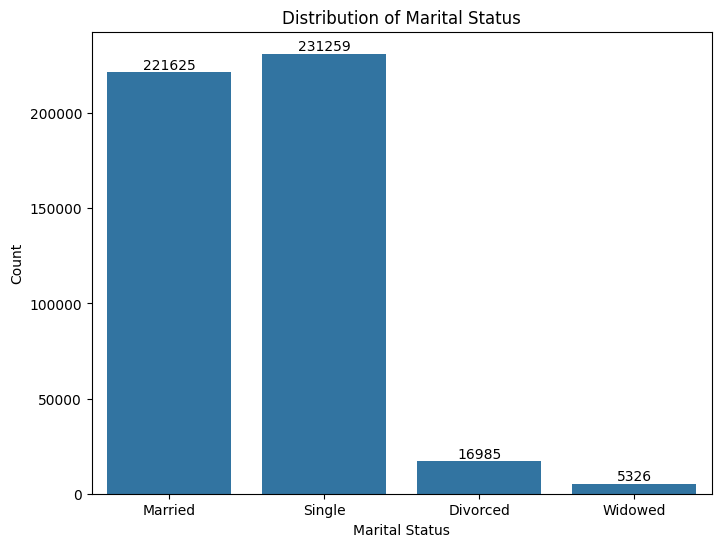

In [31]:
# Bar plot of marital_status
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='marital_status', data=train_df)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

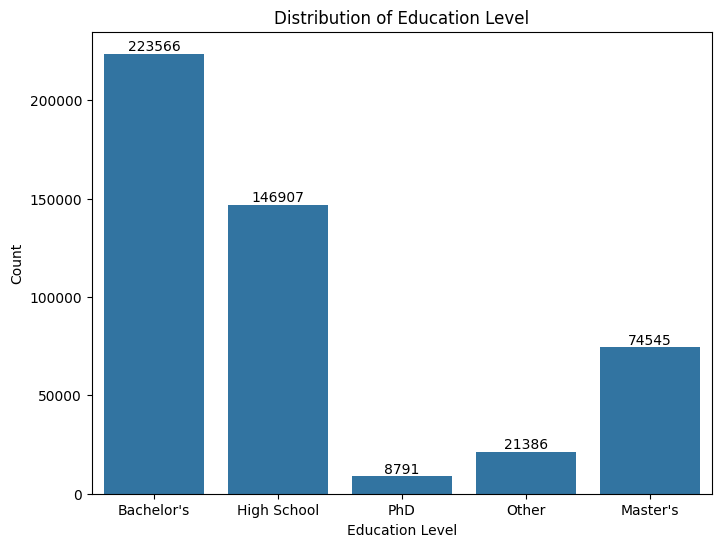

In [32]:
# Bar plot of education_level
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='education_level', data=train_df)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

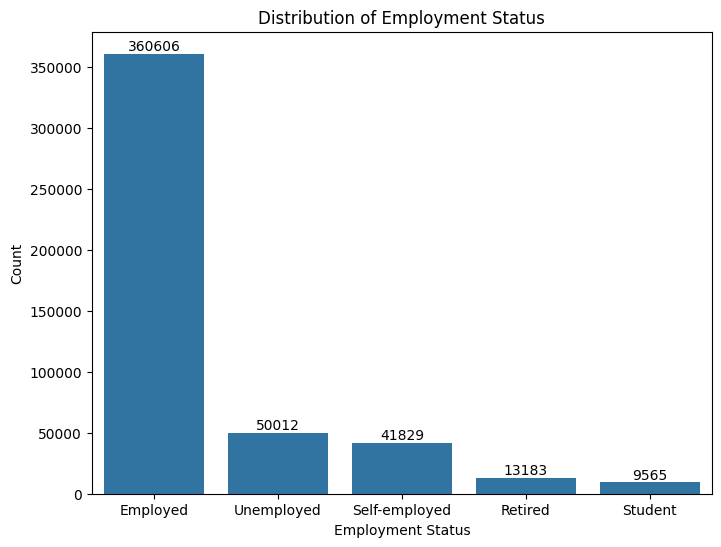

In [ ]:
# Bar plot of employment_status
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='employment_status', data=train_df)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

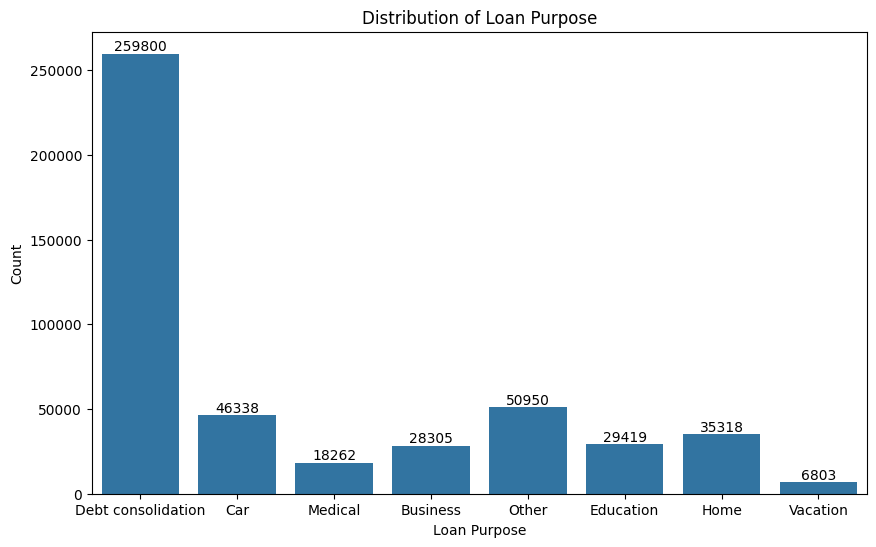

In [34]:
# Bar plot of loan_purpose
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='loan_purpose', data=train_df)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.show()

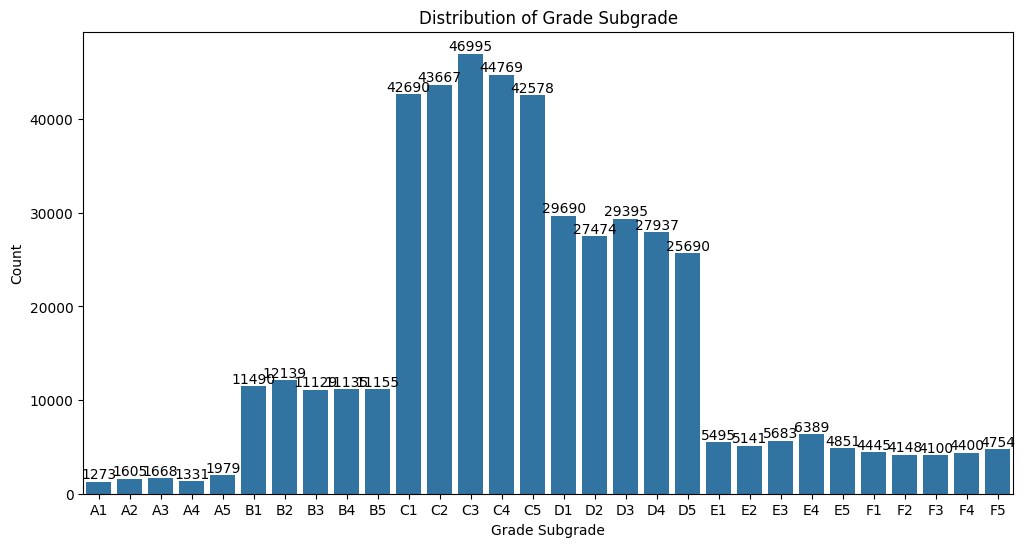

In [35]:
# Barplot of grade_subgrade
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='grade_subgrade', data=train_df, order=sorted(train_df['grade_subgrade'].unique()))
ax.bar_label(ax.containers[0])
plt.title('Distribution of Grade Subgrade')
plt.xlabel('Grade Subgrade')
plt.ylabel('Count')
plt.show()

### 2.4 Feature correlation

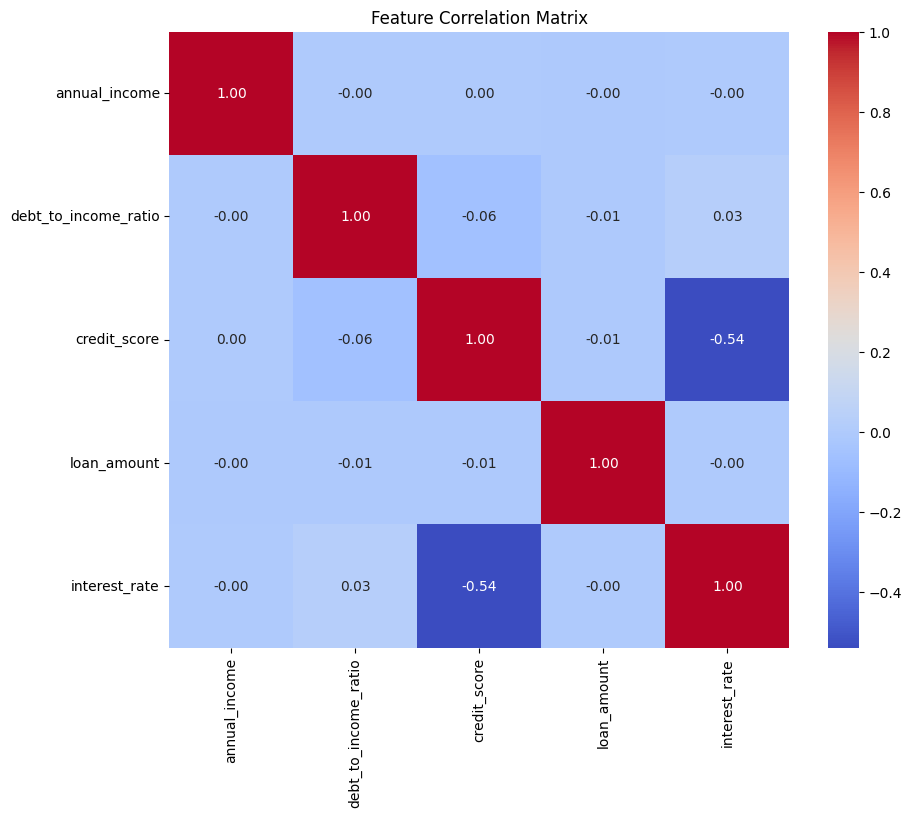

In [38]:
# List of numerical features
numerical_features = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']

# Feature correlation
plt.figure(figsize=(10, 8))
correlation_matrix = train_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()